In [1]:
import boto3

BUCKET = "amazon-rekognition2"
KEY = "teste.jpg"
region = "us-east-1"
FEATURES_BLACKLIST = ("Landmarks", "Emotions", "Pose",
                      "Quality", "BoundingBox", "Confidence")


def detect_faces(bucket, key, attributes=['ALL'], region="us-east-1"):
    rekognition = boto3.client("rekognition", region)
    response = rekognition.detect_faces(
        Image={
            "S3Object": {
                "Bucket": bucket,
                "Name": key,
            }
        },
        Attributes=attributes,
    )
    return response['FaceDetails']

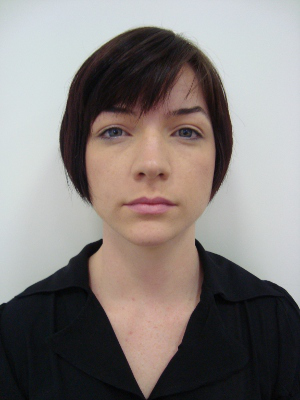

In [2]:
from PIL import Image
image_source=boto3.client('s3').get_object(Bucket=BUCKET,Key=KEY)['Body']
from IPython.display import display
display(Image.open(image_source))

In [3]:

for face in detect_faces(BUCKET, KEY, region=region):
    print("Face ({Confidence}%)".format(**face))
    # emotions
    for emotion in face['Emotions']:
        print("  {Type} : {Confidence}%".format(**emotion))
    # quality
    for quality_key in face['Quality']:
    	print("  {quality} : {value}".format(quality=quality_key, value=face['Quality'][quality_key]))
    # facial features
    for feature in face:
        if feature not in FEATURES_BLACKLIST:
            print("  {feature} {data}".format(feature=feature, data=face[feature]))


Face (100.0%)
  SAD : 2.936655282974243%
  FEAR : 0.20481537282466888%
  DISGUSTED : 0.16494137048721313%
  HAPPY : 0.26597830653190613%
  SURPRISED : 0.11276604980230331%
  CONFUSED : 0.3064354956150055%
  CALM : 92.50361633300781%
  ANGRY : 3.5047943592071533%
  Brightness : 80.40107727050781
  Sharpness : 86.86019134521484
  AgeRange {'Low': 14, 'High': 26}
  Smile {'Value': False, 'Confidence': 99.46593475341797}
  Eyeglasses {'Value': False, 'Confidence': 99.58799743652344}
  Sunglasses {'Value': False, 'Confidence': 99.85970306396484}
  Gender {'Value': 'Female', 'Confidence': 88.35455322265625}
  Beard {'Value': False, 'Confidence': 99.07178497314453}
  Mustache {'Value': False, 'Confidence': 99.73921966552734}
  EyesOpen {'Value': True, 'Confidence': 95.73031616210938}
  MouthOpen {'Value': False, 'Confidence': 99.05530548095703}
